# Haaracascade Classifier

만약 Haaracascade Classifier에 대한 추가적인 정보가 필요하시다면 [Cascade 분류기](../0_thoery/2_Cascade_%EB%B6%84%EB%A5%98%EA%B8%B0.md)를 참고해주세요.

In [43]:
import cv2
import matplotlib.pyplot as plt

## Theory

Cascade Classifier에서는 Grayscale 이미지를 권장하고 있습니다.

- 흑백 이미지 : 800 * 600 = 480,000<br>
- 컬러 이미지 : 800 * 600 * 3 = 1,440,00

기본적인 haaracascade classifier 분류기 사용과 `추가 인자 사용법`을 다루고 있습니다.

1. scaleFactor
2. minNeighbors
3. minSize
4. maxSize

(600, 800)


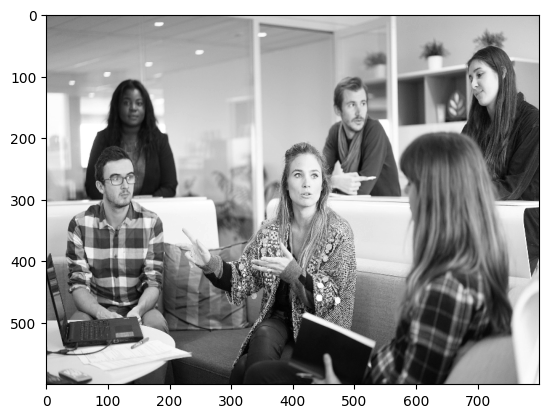

In [121]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
print(gray_image.shape)
plt.imshow(gray_image, cmap='gray')

In [122]:
org_image = cv2.imread('../../assets/Images/people1.jpg')
cvt_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
target_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

face_detector = cv2.CascadeClassifier('../../assets/Cascades/haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(target_image)
print(len(detections))

7


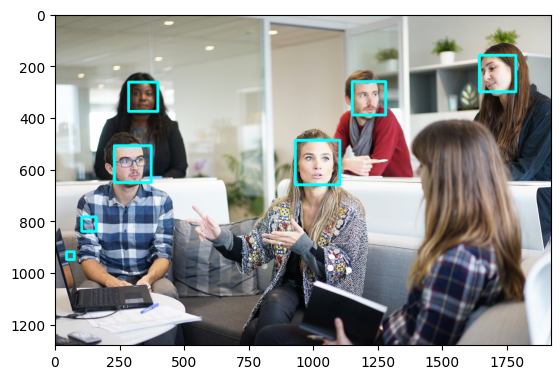

In [123]:
for (x, y, w, h) in detections:
    cv2.rectangle(cvt_image, (x, y), (x+w, y+h), (0, 255, 255), 10)
plt.imshow(cvt_image)

## ScaleFactor

이미지의 크기에 따라서 scaleFactor를 조절해가면서 튜닝을 할 수 있습니다.

In [124]:
org_image = cv2.imread('../../assets/Images/people1.jpg')
cvt_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
target_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

face_detector = cv2.CascadeClassifier('../../assets/Cascades/haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(target_image, scaleFactor = 1.485)
print(len(detections))

5


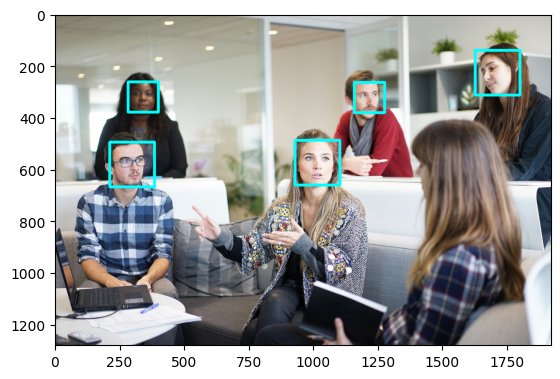

In [125]:
for (x, y, w, h) in detections:
    cv2.rectangle(cvt_image, (x, y), (x+w, y+h), (0, 255, 255), 10)
plt.imshow(cvt_image)

## minNeighbors

최소 이웃의 수를 늘리면서 Negative Selections의 수를 줄일 수 있습니다.<br>
그러나 모든 Positive Selections를 감지하는 것은 불가능할 수 있으며, 그 반대급부로 Negative Selections의 수가 늘어날 수 있습니다.<br>
따라서 다음의 기로에서 선택하는 것은 엔지니어의 능력입니다.

1. Haaracascade Classifier의 품질 유지 : Negativae Selections가 나오지 않게 만드릭
2. Haaracascade Classifier의 성능 향상 : Positive Selections의 수를 늘리고 그 대가로 약간의 Negative Selections는 감수

12


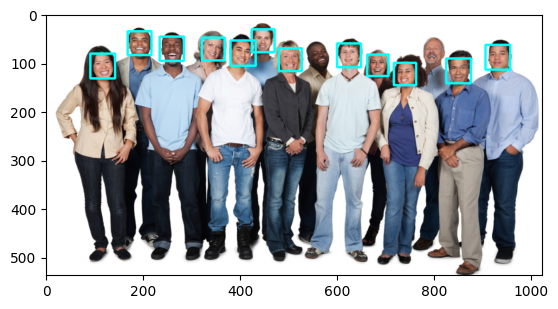

In [126]:
org_image = cv2.imread('../../assets/Images/people2.jpg')
cvt_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
target_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

face_detector = cv2.CascadeClassifier('../../assets/Cascades/haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(target_image, scaleFactor = 1.2, minNeighbors=7)
print(len(detections))

for (x, y, w, h) in detections:
    cv2.rectangle(cvt_image, (x, y), (x+w, y+h), (0, 255, 255), 3)
plt.imshow(cvt_image)

## minSize

**최소 크기**의 숫자를 조절하여, 너무 멀리 있는 대상은 잡지 않는 것처럼 만들 수 있습니다.<br>
다음 구문을 통해서 전체적인 크기 (w, h)를 기준으로 삼고 최소 크기를 지정할 수 있습니다.

```python
for (x, y, w, h) in detections:
   print(w, h)
```

10


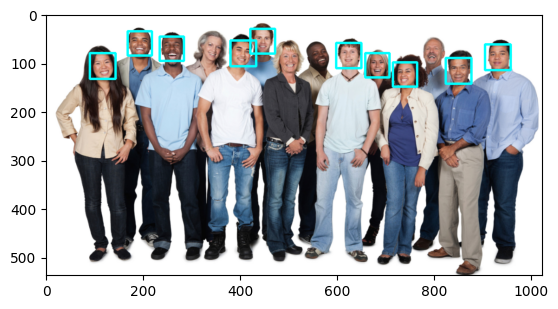

In [127]:
org_image = cv2.imread('../../assets/Images/people2.jpg')
cvt_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
target_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

face_detector = cv2.CascadeClassifier('../../assets/Cascades/haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(target_image, scaleFactor = 1.2, minNeighbors=7, minSize=(44,44))
print(len(detections))

for (x, y, w, h) in detections:
    cv2.rectangle(cvt_image, (x, y), (x+w, y+h), (0, 255, 255), 3)
plt.imshow(cvt_image)

## maxSize

**최대 크기**의 숫자를 조절하여, 너무 가까운 대상은 잡지 않는 것처럼 만들 수 있습니다.

10


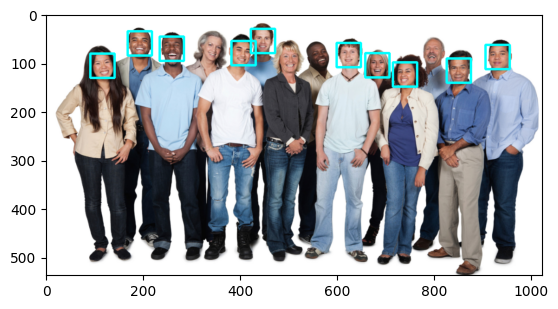

In [128]:
org_image = cv2.imread('../../assets/Images/people2.jpg')
cvt_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
target_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

face_detector = cv2.CascadeClassifier('../../assets/Cascades/haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(target_image, scaleFactor = 1.2, minNeighbors=7, minSize=(44,44), maxSize=(50, 50))
print(len(detections))

for (x, y, w, h) in detections:
    cv2.rectangle(cvt_image, (x, y), (x+w, y+h), (0, 255, 255), 3)
plt.imshow(cvt_image)